<a href="https://colab.research.google.com/github/Taelelrey/AI/blob/main/Copy_of_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.utils import np_utils
import tensorflow as tf

np.random.seed(0)

#Data


In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Visulize examples


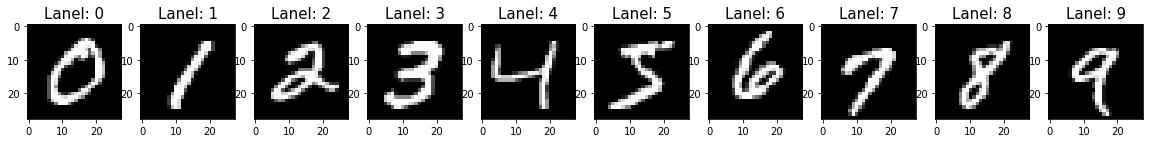

In [ ]:
num_classes= 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range (0, num_classes):
  sample = x_train[y_train == i] [0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Lanel: {}". format(i), fontsize=15)

In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
y_train = keras.utils.np_utils.to_categorical (y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test,num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#Data preparation

In [ ]:
# first Normalize the data
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
#reshape of data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test =x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


#Model creation

In [ ]:
model= Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=238, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 238)               30702     
                                                                 
 dropout_1 (Dropout)         (None, 238)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                2390      
                                                                 
Total params: 133,572
Trainable params: 133,572
Non-trainable params: 0
_________________________________________________________________


#Train

In [ ]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)



Epoch 1/10
118/118 [==============================] - 2s 11ms/step - loss: 0.5463 - accuracy: 0.8424
Epoch 2/10
118/118 [==============================] - 1s 11ms/step - loss: 0.2015 - accuracy: 0.9416
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1463 - accuracy: 0.9571
Epoch 4/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1141 - accuracy: 0.9655
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0943 - accuracy: 0.9720
Epoch 6/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0781 - accuracy: 0.9767
Epoch 7/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0675 - accuracy: 0.9792
Epoch 8/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0593 - accuracy: 0.9818
Epoch 9/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0499 - accuracy: 0.9850
Epoch 10/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0449 - accura

#Evaluation


In [ ]:
test_loss, test_acc =model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9773
Test Loss: 0.07497882097959518, Test Accuracy: 0.9772999882698059


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

[[1.90421062e-07 4.70756248e-07 5.05943262e-06 ... 9.99938488e-01
  6.57481337e-07 1.19011756e-05]
 [4.44122339e-09 4.12518857e-05 9.99942780e-01 ... 1.09867404e-09
  1.52509614e-07 1.17836236e-11]
 [1.14593843e-06 9.97754037e-01 1.33678317e-04 ... 1.05089566e-03
  3.45063570e-04 9.56779695e-06]
 ...
 [1.23903027e-10 3.45130102e-09 2.96870972e-10 ... 1.50965172e-06
  2.46554350e-07 4.22908033e-06]
 [1.29220403e-08 7.60912471e-08 3.01407371e-11 ... 1.45299905e-09
  7.55281235e-06 7.79256382e-10]
 [1.19769069e-07 2.40465203e-09 3.29517458e-09 ... 1.46076345e-10
  2.03254018e-08 5.39526690e-09]]
[7 2 1 ... 4 5 6]


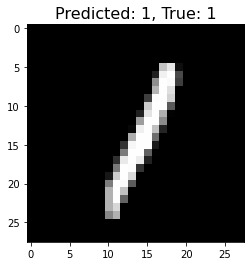

In [ ]:
#Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true =np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
mat = x_sample.reshape(28,28)
plt.imshow(mat, cmap='gray')

#Confusion Matrix

Text(0.5, 1.0, 'confusion matrix')

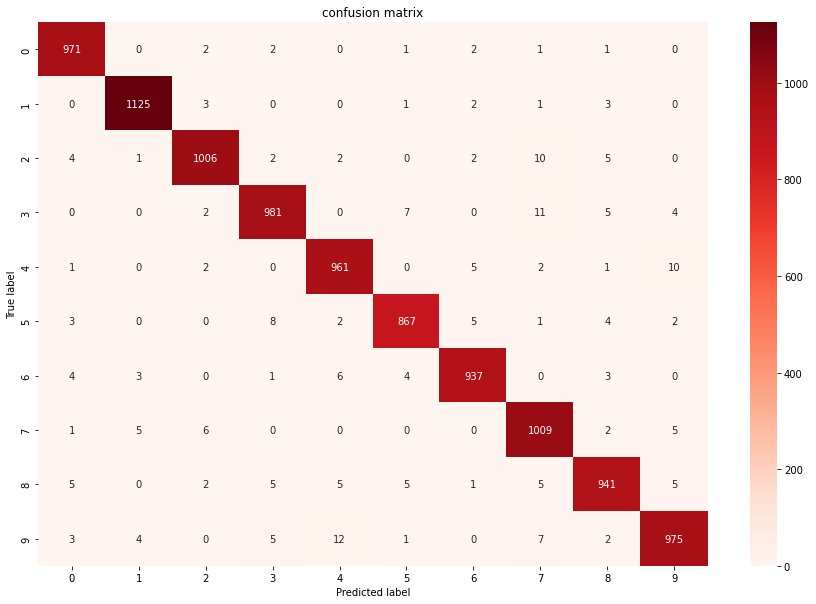

In [ ]:
confusion_mtx =confusion_matrix(y_true, y_pred_classes)

#Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Reds")
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('confusion matrix')

Group G

ODIWOUR GEOFFREY CIT-227-012/2018 model creation data preparation

ADHIAMBO REBECCA CIT-227-004/2018 visualize examples confusion matrix 

KAMAU JOHN KIIRU CIT-227-030/2019 training 

CHERERE ELVIS NDUATI CIT-227-056/2019 evaluation

IDIGU NEEMA CIT-227-020/2018 data and imports